In [1]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('seaborn-pastel')
%matplotlib inline

twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry


## Loading data

In [2]:
# Read file obtained from my pipeline
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=1)

# Drop the extra index collumn csv conversion created
usage_df = usage_df.drop(usage_df.columns[0], axis=1)

usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


## Spaghetti plot visualization

In [3]:
# Transpose for plotting
sp_df = usage_df.transpose()
sp_df.head()

Weapon Name,Splattershot,Range Blaster,Splat Roller,N-ZAP '85,Splat Brella,Sloshing Machine,Splat Charger,Splattershot Pro,Tentatek Splattershot,Sploosh-o-matic,...,Tri-Slosher Nouveau,Neo Splash-o-matic,Custom Range Blaster,Glooga Dualies Deco,Foil Squeezer,New Squiffer,Carbon Roller Deco,Custom Dualie Squelchers,Rapid Blaster Pro Deco,Undercover Sorella Brella
Week 1,0.1710,0.0683,0.0671,0.0615,0.0494,0.0446,0.0345,0.0308,0.0254,0.0252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 2,0.1598,0.0639,0.0693,0.0665,0.0583,0.0424,0.0310,0.0327,0.0272,0.0256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 3,0.1548,0.0617,0.0755,0.0714,0.0591,0.0440,0.0319,0.0328,0.0261,0.0286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 4,0.1462,0.0634,0.0712,0.0693,0.0615,0.0476,0.0341,0.0305,0.0359,0.0257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 5,0.0941,0.0577,0.0742,0.0776,0.0570,0.0400,0.0341,0.0283,0.0654,0.0225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


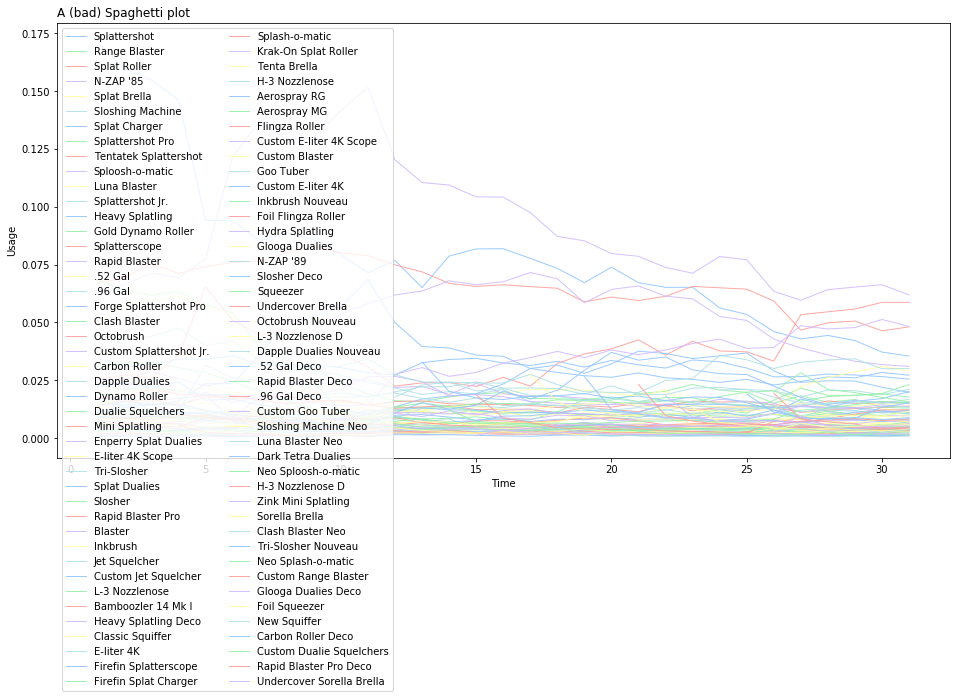

In [4]:
# Make new collumn to plot x
sp_df['x'] = np.arange(1, sp_df.shape[0]+1)

fig, ax = plt.subplots(1, figsize=(16, 8))

# multiple line plot
num=0
for column in sp_df.drop('x', axis=1):
    num+=1
    ax.plot(sp_df['x'], sp_df[column], marker='', linewidth=1, alpha=0.9, label=column)

# Add legend
ax.legend(loc=2, ncol=2)

# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Time")
plt.ylabel("Usage");

This plot is next to useless, time to look at the most used weapons

In [5]:
usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


In [6]:
usage_df.columns

Index(['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',
       'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13',
       'Week 14', 'Week 15', 'Week 16', 'Week 17', 'Week 18', 'Week 19',
       'Week 20', 'Week 21', 'Week 22', 'Week 23', 'Week 24', 'Week 25',
       'Week 26', 'Week 27', 'Week 28', 'Week 29', 'Week 30', 'Week 31'],
      dtype='object')

In [15]:
# Top 10 in final week
final = usage_df.sort_values(by=['Week 31'], ascending=False).head(10)
final

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587
Enperry Splat Dualies,0.0104,0.0104,0.0087,0.0134,0.0198,0.0154,0.0180,0.0180,0.0153,0.0140,...,0.0381,0.0409,0.0428,0.0388,0.0392,0.0486,0.0472,0.0478,0.0513,0.0483
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Blaster,0.0077,0.0068,0.0064,0.0071,0.0075,0.0092,0.0178,0.0330,0.0472,0.0537,...,0.0614,0.0602,0.0526,0.0509,0.0428,0.0390,0.0360,0.0332,0.0318,0.0310
Dapple Dualies Nouveau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0249,0.0258,0.0358,0.0339,0.0301,0.0328,0.0338,0.0343,0.0300,0.0301
Custom Blaster,0.0013,0.0012,0.0014,0.0017,0.0035,0.0028,0.0077,0.0085,0.0084,0.0068,...,0.0133,0.0123,0.0115,0.0116,0.0124,0.0223,0.0262,0.0287,0.0309,0.0291
Forge Splattershot Pro,0.0150,0.0144,0.0143,0.0161,0.0235,0.0236,0.0361,0.0503,0.0525,0.0570,...,0.0261,0.0254,0.0241,0.0254,0.0230,0.0245,0.0265,0.0261,0.0284,0.0272


In [16]:
# Top 10 in mean usage
tdf = usage_df.transpose()
mean = tdf.reindex(tdf.mean().sort_values(ascending=False).index, axis=1).transpose().head(10)
mean

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Blaster,0.0077,0.0068,0.0064,0.0071,0.0075,0.0092,0.0178,0.0330,0.0472,0.0537,...,0.0614,0.0602,0.0526,0.0509,0.0428,0.0390,0.0360,0.0332,0.0318,0.0310
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587
Forge Splattershot Pro,0.0150,0.0144,0.0143,0.0161,0.0235,0.0236,0.0361,0.0503,0.0525,0.0570,...,0.0261,0.0254,0.0241,0.0254,0.0230,0.0245,0.0265,0.0261,0.0284,0.0272
Splat Charger,0.0345,0.0310,0.0319,0.0341,0.0341,0.0356,0.0319,0.0310,0.0315,0.0305,...,0.0303,0.0338,0.0330,0.0303,0.0265,0.0266,0.0277,0.0273,0.0266,0.0255
Enperry Splat Dualies,0.0104,0.0104,0.0087,0.0134,0.0198,0.0154,0.0180,0.0180,0.0153,0.0140,...,0.0381,0.0409,0.0428,0.0388,0.0392,0.0486,0.0472,0.0478,0.0513,0.0483
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130


In [17]:
# Top 10 in peak usage
tdf = usage_df.transpose()
peak = tdf.reindex(tdf.max().sort_values(ascending=False).index, axis=1).transpose().head(10)
peak

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Blaster,0.0077,0.0068,0.0064,0.0071,0.0075,0.0092,0.0178,0.0330,0.0472,0.0537,...,0.0614,0.0602,0.0526,0.0509,0.0428,0.0390,0.0360,0.0332,0.0318,0.0310
Forge Splattershot Pro,0.0150,0.0144,0.0143,0.0161,0.0235,0.0236,0.0361,0.0503,0.0525,0.0570,...,0.0261,0.0254,0.0241,0.0254,0.0230,0.0245,0.0265,0.0261,0.0284,0.0272
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119
Enperry Splat Dualies,0.0104,0.0104,0.0087,0.0134,0.0198,0.0154,0.0180,0.0180,0.0153,0.0140,...,0.0381,0.0409,0.0428,0.0388,0.0392,0.0486,0.0472,0.0478,0.0513,0.0483
